In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dm_office_sales - dm_office_sales.csv')
df

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802
...,...,...,...,...,...,...
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354


In [4]:
df['division'].unique()

array(['printers', 'peripherals', 'office supplies', 'computer hardware',
       'computer software'], dtype=object)

In [5]:
df1 = df[['division','sales']]
df1

,division,sales
0,printers,372302
1,printers,495660
2,peripherals,320453
3,office supplies,377148
4,office supplies,312802
...,...,...
995,computer hardware,177953
996,computer software,103703
997,peripherals,450011
998,peripherals,330354


In [6]:
sales_by_division = df.groupby('division')['sales'].sum()

In [7]:
sales_by_division = sales_by_division.sort_values(ascending=False)
sales_by_division

division
office supplies      85935800
peripherals          83818613
printers             83230970
computer hardware    53930229
computer software    32918234
Name: sales, dtype: int64

## Пункт №1

C:\Users\azizr\AppData\Local\Temp\ipykernel_11404\3978950128.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(sales_by_division,


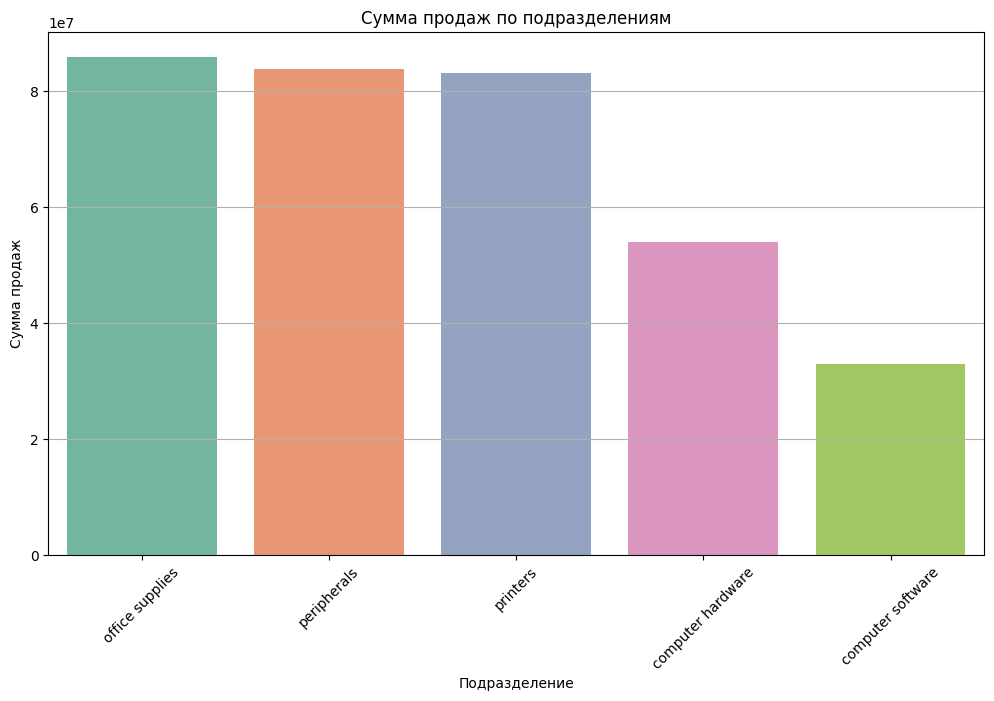

In [8]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Сумма продаж по подразделениям')
plt.xlabel('Подразделение')
plt.ylabel('Сумма продаж')
plt.tight_layout(pad=0)
plt.grid(linestyle='-', alpha = 1, axis='y')
sns.barplot(sales_by_division,
            palette='Set2',
)
plt.show()

- По данному графику мы можем сказать, что большего всего продаж было в подразделении office supplies (больше 80 миллионов).
- Два выделяющихся подразделения с самым меньшим количеством продаж это: computer hardware, computer software. 
- Как по мне лидером является office supplies, также огромная разница в продаже между 3 первыми подрахделениями и двумя последними (особенно последним). Возможно стоит обратить внимание на эти подразделения и понять в чем причина.

## Пункт №2

In [ ]:
df2 = df[['division', 'salary', 'sales']]
df2

,division,salary,sales
0,printers,91684,372302
1,printers,119679,495660
2,peripherals,82045,320453
3,office supplies,92949,377148
4,office supplies,71280,312802
...,...,...,...
995,computer hardware,70083,177953
996,computer software,68648,103703
997,peripherals,108354,450011
998,peripherals,79035,330354


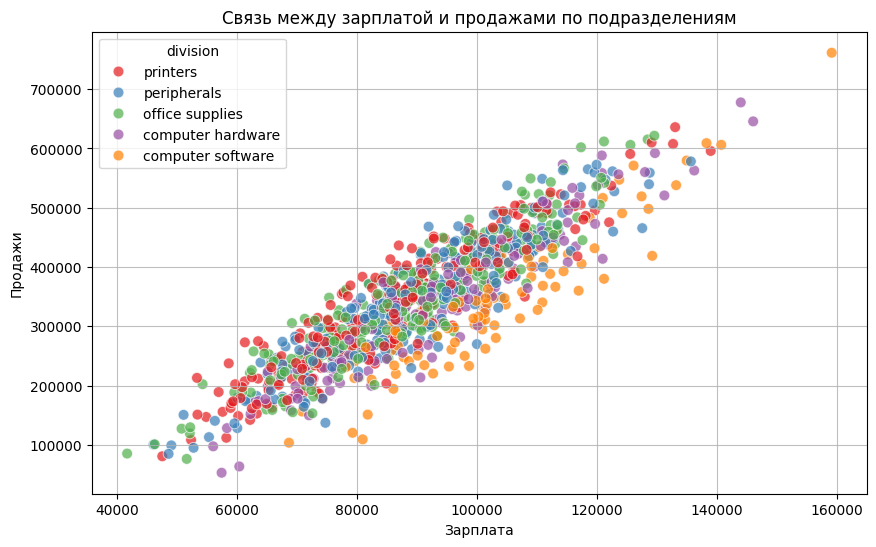

In [16]:
plt.figure(figsize=(10, 6))
plt.title('Связь между зарплатой и продажами по подразделениям')
plt.xlabel('Зарплата')
plt.ylabel('Продажи')
plt.grid(linestyle='-', alpha = 0.8)

sns.scatterplot(df2, x='salary', y='sales',
             alpha = 0.7,
             s=60,
             hue = 'division',
             palette='Set1'
)
plt.show()

In [14]:
correlation = df2['salary'].corr(df2['sales'])
correlation

np.float64(0.8973763914469787)

- По данному графику, мы можем сказать, что корреляция между двумя переменными продажи и заработок очень хорошая и даже в каком то роде стабильная. Корреляция линейная. При сравнительно низких продажах высокий заработок имеет подраздел computer hardware. Чем выше продажи, тем больше заработок.  

## Пункт №3

In [17]:
df3 = df[['division', 'training level', 'sales']]
df3

,division,training level,sales
0,printers,2,372302
1,printers,2,495660
2,peripherals,0,320453
3,office supplies,2,377148
4,office supplies,1,312802
...,...,...,...
995,computer hardware,1,177953
996,computer software,1,103703
997,peripherals,2,450011
998,peripherals,2,330354


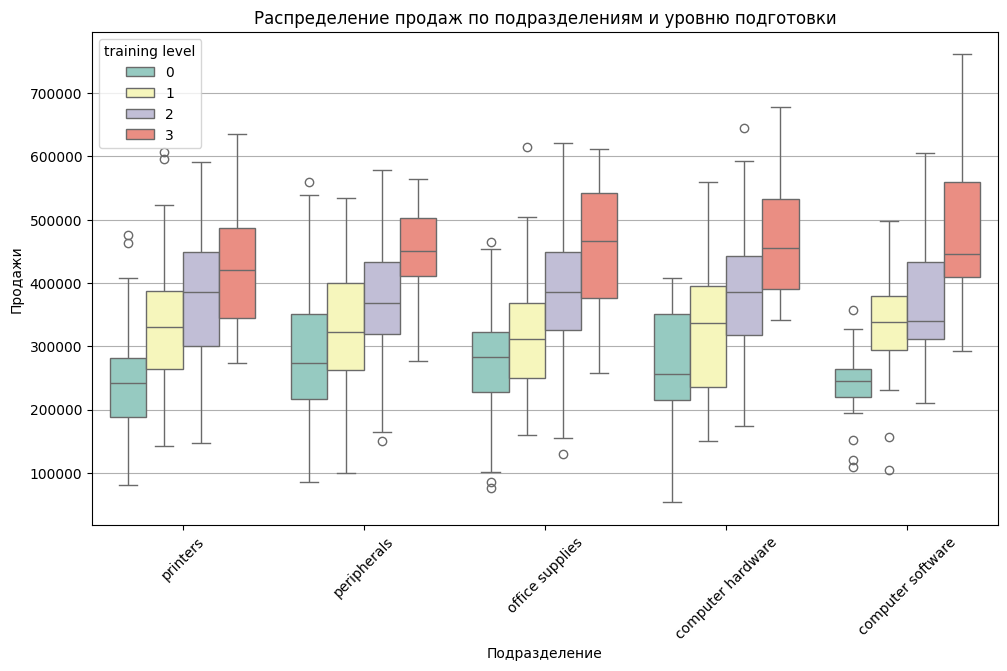

In [21]:
plt.figure(figsize=(10, 6))
plt.title('Распределение продаж по подразделениям и уровню подготовки')
plt.xlabel('Подразделение')
plt.ylabel('Продажи')
plt.grid(linestyle='-', alpha = 0.8)
plt.xticks(rotation=45)
plt.grid(linestyle='-', alpha = 1, axis='y')
plt.tight_layout()

sns.boxplot(df3, x='division', y='sales',
             hue = 'training level',
             palette='Set3'
)
plt.show()

- Медианные продажи растут с уровнем подготовки во всех подразделениях, особенно ярко в «computer software» и «computer hardware», тогда как в «printers» и «peripherals» медианы уровней 1 и 2 близки.
- Наибольший разброс (IQR) наблюдается в «computer software» и «computer hardware», а наиболее стабильными выглядят «printers» и «office supplies».
- Экстремальные выбросы чаще встречаются в низших уровнях подготовки, особенно в «computer software» и «office supplies» у уровня 0.
- Значительные перекрытия IQR есть в «printers» и «peripherals» между уровнями 1 и 2.
- Наиболее предсказуемые продажи в «printers», а наибольшее влияние уровня подготовки – в «computer software».